# Pandas: Series and DataFrame

In [1]:
import pandas as pd
import numpy as np


# Series


In [2]:
#Creating Series
lis = [np.random.randint(0,100) for x in range(0,6) ]#List comprehension
lis

[98, 70, 64, 23, 67, 68]

In [3]:

#Pass the list to the Series constructor
pd.Series(lis)

0    98
1    70
2    64
3    23
4    67
5    68
dtype: int64

In [4]:
#Creating Series from Numpy Arrays

lis = np.array(lis)
print("Array:",lis)
print("Series:\n", pd.Series(lis))

Array: [98 70 64 23 67 68]
Series:
 0    98
1    70
2    64
3    23
4    67
5    68
dtype: int64


In [5]:
label = ['James','John','Jane','Maria','Sam','Jean']

In [6]:
s1 = pd.Series(lis,label,name="Maths")

In [7]:
print(s1)

James    98
John     70
Jane     64
Maria    23
Sam      67
Jean     68
Name: Maths, dtype: int64


In [8]:
#Creating Series from Dictionaries
marks =  {'James':90,'John':87,'Jane':76,'Maria':90,'Sam':94,'Jean':76}

In [9]:
marks = pd.Series(marks)
marks

James    90
John     87
Jane     76
Maria    90
Sam      94
Jean     76
dtype: int64

# Retrieving Data from Series

Using index

In [10]:
marks['James']

90

In [11]:
s1[0]

98

#You can change or modify the data value of a Series

In [12]:
s1['Jane'] = 89
s1[0] = 50

In [13]:
s1

James    50
John     70
Jane     89
Maria    23
Sam      67
Jean     68
Name: Maths, dtype: int64

In [14]:
s1[[0,1]]

James    50
John     70
Name: Maths, dtype: int64

In [15]:
#Using loc : To specifically state that we are using labelled index

In [16]:
s1.loc["James"]


50

In [17]:
s1.loc[["James","Jane"]]


James    50
Jane     89
Name: Maths, dtype: int64

In [18]:
#Using iloc : To specifically state that we are using numeric index

In [19]:
s1.iloc[4]

67

In [20]:
s1.iloc[[2,3]]

Jane     89
Maria    23
Name: Maths, dtype: int64

In [21]:
#Deleting Values from Series

In [22]:
s1.drop("Jane")#Note how jane's score still remains in the original Series. To  drop Janes, set the inplace parameter to true!

James    50
John     70
Maria    23
Sam      67
Jean     68
Name: Maths, dtype: int64

In [23]:
s1

James    50
John     70
Jane     89
Maria    23
Sam      67
Jean     68
Name: Maths, dtype: int64

In [24]:
#Arithmetic operations on Pandas Series

In [25]:
s2 = s1 + 5
s2

James    55
John     75
Jane     94
Maria    28
Sam      72
Jean     73
Name: Maths, dtype: int64

In [26]:
#What is the average score?
s1.mean()

61.166666666666664

In [27]:
s1.idxmin()


'Maria'

In [28]:
s1.idxmax()


'Jane'

In [29]:
np.max(s1)#Highest score

89

In [30]:

s1["James"] + 20

70

In [31]:
s1

James    50
John     70
Jane     89
Maria    23
Sam      67
Jean     68
Name: Maths, dtype: int64

In [32]:
#Lowest score?
s1.min()

23

# DataFrame
Is a two dimensional object with rows and columns, can hold and process  data of mixed types!

In [33]:
#Let's create a DataFrame containing scores of 6 students in  6 subjects

In [34]:
score = [ np.random.randint(0,101) for x in range(0,36)]

In [35]:
scores = np.array(score)

In [36]:
scores

array([16, 40,  9, 10, 54, 56, 12, 50, 52, 99, 32,  8, 54, 83, 61, 17,  5,
       21, 90, 64, 64, 79,  5, 57, 14, 80, 13, 90, 36, 89, 66, 35, 82, 63,
       59, 80])

In [37]:
student_score = scores.reshape(6,6)

In [38]:
student_score

array([[16, 40,  9, 10, 54, 56],
       [12, 50, 52, 99, 32,  8],
       [54, 83, 61, 17,  5, 21],
       [90, 64, 64, 79,  5, 57],
       [14, 80, 13, 90, 36, 89],
       [66, 35, 82, 63, 59, 80]])

In [39]:
students = ['James','John','Jane','Maria','Sam','Jean']
subjects = ['Maths','History','Physics','Chemistry','IT','Biology']

In [40]:
df = pd.DataFrame(data= student_score, index=students,columns=subjects)

In [41]:
df

,Maths,History,Physics,Chemistry,IT,Biology
James,16,40,9,10,54,56
John,12,50,52,99,32,8
Jane,54,83,61,17,5,21
Maria,90,64,64,79,5,57
Sam,14,80,13,90,36,89
Jean,66,35,82,63,59,80


In [42]:
df.iloc[[0]]

,Maths,History,Physics,Chemistry,IT,Biology
James,16,40,9,10,54,56


In [43]:
#Merging Dataframes
s1 = [90,87,78,95,76]
s2 = [56,67,30,32,31]
names = ['James', 'John','Jane','Maria','Samuel']
df1 = pd.DataFrame({"Maths":s1}, index= names)
df2 = pd.DataFrame({"Physics":s2}, index = names)

In [44]:
df1

,Maths
James,90
John,87
Jane,78
Maria,95
Samuel,76


In [45]:
df2

,Physics
James,56
John,67
Jane,30
Maria,32
Samuel,31


In [46]:
df3 = pd.merge(df1,df2,  right_index=True, left_index=True)

In [47]:
df3

,Maths,Physics
James,90,56
John,87,67
Jane,78,30
Maria,95,32
Samuel,76,31


<AxesSubplot:>

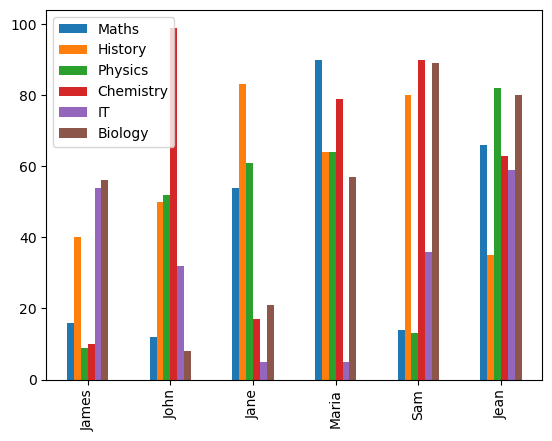

In [48]:
import matplotlib.pyplot as plt
display(df.plot(kind='bar'))
#plt.savefig('graph.png')

<AxesSubplot:>

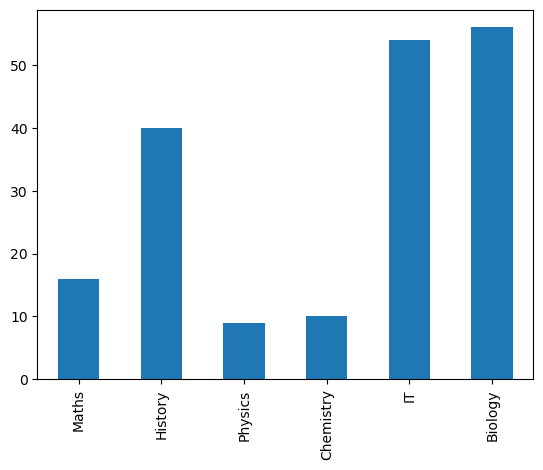

In [49]:
display(df.loc['James'].plot(kind = 'bar', y='Marks'))


In [50]:
#Let's retrieve the index of our dataframe, this contains students' names

In [51]:
df.index#returns the index as an object

Index(['James', 'John', 'Jane', 'Maria', 'Sam', 'Jean'], dtype='object')

In [52]:
#Let's retrieve the columns of our dataframe, this contains the subjects!

In [53]:
df.columns#returns the columns as an object

Index(['Maths', 'History', 'Physics', 'Chemistry', 'IT', 'Biology'], dtype='object')

In [54]:
df.values#returns the data values as a 2-d array

array([[16, 40,  9, 10, 54, 56],
       [12, 50, 52, 99, 32,  8],
       [54, 83, 61, 17,  5, 21],
       [90, 64, 64, 79,  5, 57],
       [14, 80, 13, 90, 36, 89],
       [66, 35, 82, 63, 59, 80]])

In [55]:
df.describe()#descriptive statistics of our dataframe

,Maths,History,Physics,Chemistry,IT,Biology
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,42.000000,58.666667,46.833333,59.666667,31.833333,51.833333
std,32.814631,20.294498,29.444298,37.787123,23.181171,31.908724
min,12.000000,35.000000,9.000000,10.000000,5.000000,8.000000
25%,14.500000,42.500000,22.750000,28.500000,11.750000,29.750000
50%,35.000000,57.000000,56.500000,71.000000,34.000000,56.500000
75%,63.000000,76.000000,63.250000,87.250000,49.500000,74.250000
max,90.000000,83.000000,82.000000,99.000000,59.000000,89.000000


# Retrieving Data from DataFrame

In [56]:
#let's retrieve all scores for Biology

x = df["Biology"]
print(type(x))

<class 'pandas.core.series.Series'>


In [57]:
#for multiple columns
y = df[["Biology","Chemistry"]]
print(type(y))
print(y)

<class 'pandas.core.frame.DataFrame'>
       Biology  Chemistry
James       56         10
John         8         99
Jane        21         17
Maria       57         79
Sam         89         90
Jean        80         63


In [58]:
#What did James score in Maths? Do not use the index in the first []!
df['Maths']['James']

16

In [59]:
#Retrieving a row. What did John score in all subjects?

In [60]:
df.loc[["John"]]

,Maths,History,Physics,Chemistry,IT,Biology
John,12,50,52,99,32,8


In [61]:
df.loc[["John"]]#

,Maths,History,Physics,Chemistry,IT,Biology
John,12,50,52,99,32,8


# Adding Columns to DataFrame

In [62]:
#Adding new Columns. Let's add the scores of all students in Geography!
df["Geography"] = [56,78,86,34,45,70]

In [63]:
df

,Maths,History,Physics,Chemistry,IT,Biology,Geography
James,16,40,9,10,54,56,56
John,12,50,52,99,32,8,78
Jane,54,83,61,17,5,21,86
Maria,90,64,64,79,5,57,34
Sam,14,80,13,90,36,89,45
Jean,66,35,82,63,59,80,70


In [64]:
#Adding new rows. Let's add the scores for Patrick.
Patrick = {"Maths":78,"History":67,"Physics":90,"Chemistry":76,"IT":98,"Geography":78}


In [65]:
patrick_df = pd.DataFrame(Patrick, index=["Patrick"])

In [66]:
patrick_df

,Maths,History,Physics,Chemistry,IT,Geography
Patrick,78,67,90,76,98,78


In [67]:
df_1 = df.append(patrick_df, sort=False)
df_1


/tmp/ipykernel_22324/3404968820.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df.append(patrick_df, sort=False)


,Maths,History,Physics,Chemistry,IT,Biology,Geography
James,16,40,9,10,54,56.0,56
John,12,50,52,99,32,8.0,78
Jane,54,83,61,17,5,21.0,86
Maria,90,64,64,79,5,57.0,34
Sam,14,80,13,90,36,89.0,45
Jean,66,35,82,63,59,80.0,70
Patrick,78,67,90,76,98,NaN,78


In [68]:
#df.fillna(df['Biology'].mean())

In [69]:
df_1['Biology']['Patrick'] = 89
df_1

/tmp/ipykernel_22324/2474260593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Biology']['Patrick'] = 89


,Maths,History,Physics,Chemistry,IT,Biology,Geography
James,16,40,9,10,54,56.0,56
John,12,50,52,99,32,8.0,78
Jane,54,83,61,17,5,21.0,86
Maria,90,64,64,79,5,57.0,34
Sam,14,80,13,90,36,89.0,45
Jean,66,35,82,63,59,80.0,70
Patrick,78,67,90,76,98,89.0,78


In [70]:
#Inserting columns to specific location. Let's add scores for new subject(Arts) at column(0)

df.insert(0,"Arts",[90,67,88,98,67,85])

In [71]:
df

,Arts,Maths,History,Physics,Chemistry,IT,Biology,Geography
James,90,16,40,9,10,54,56,56
John,67,12,50,52,99,32,8,78
Jane,88,54,83,61,17,5,21,86
Maria,98,90,64,64,79,5,57,34
Sam,67,14,80,13,90,36,89,45
Jean,85,66,35,82,63,59,80,70


# Deletion
You can delete using pop and drop functions of DataFrame

In [72]:
# Deleting using pop and drop functions
#Pop deletes columns, drop deletes both columns and rows


In [74]:
df.pop("Geography")

James    56
John     78
Jane     86
Maria    34
Sam      45
Jean     70
Name: Geography, dtype: int64

In [ ]:
df

In [75]:
#Deleting columns using drop function, remember to set the axis to 1
dropped = df.drop(["Arts", "Biology"], axis=1)
dropped

,Maths,History,Physics,Chemistry,IT
James,16,40,9,10,54
John,12,50,52,99,32
Jane,54,83,61,17,5
Maria,90,64,64,79,5
Sam,14,80,13,90,36
Jean,66,35,82,63,59


In [76]:
#deleting rows using drop function...remember to set the axis to 0.
dropped = df.drop(["James", "John"], axis=0)
dropped

,Arts,Maths,History,Physics,Chemistry,IT,Biology
Jane,88,54,83,61,17,5,21
Maria,98,90,64,64,79,5,57
Sam,67,14,80,13,90,36,89
Jean,85,66,35,82,63,59,80


In [77]:
#Changing row/columns label using rename function
df.rename(columns={"IT":"Computing"})

,Arts,Maths,History,Physics,Chemistry,Computing,Biology
James,90,16,40,9,10,54,56
John,67,12,50,52,99,32,8
Jane,88,54,83,61,17,5,21
Maria,98,90,64,64,79,5,57
Sam,67,14,80,13,90,36,89
Jean,85,66,35,82,63,59,80


In [78]:
#Changing row/columns label using rename function
df.rename(index={"Sam":"Samuel"})

,Arts,Maths,History,Physics,Chemistry,IT,Biology
James,90,16,40,9,10,54,56
John,67,12,50,52,99,32,8
Jane,88,54,83,61,17,5,21
Maria,98,90,64,64,79,5,57
Samuel,67,14,80,13,90,36,89
Jean,85,66,35,82,63,59,80


# Cleaning Data 
How to deal with missing values.

In [80]:
import math
NaN = float('nan')
df["Agriculture"] = [56,78,NaN,34,NaN,70]

#df["Maths"]["Jean"]=NaN
#df["Biology"]["Jean"]=NaN

In [82]:
df


,Arts,Maths,History,Physics,Chemistry,IT,Biology,Agriculture
James,90,16,40,9,10,54,56,56.0
John,67,12,50,52,99,32,8,78.0
Jane,88,54,83,61,17,5,21,NaN
Maria,98,90,64,64,79,5,57,34.0
Sam,67,14,80,13,90,36,89,NaN
Jean,85,66,35,82,63,59,80,70.0


In [83]:
df_null = df.isnull()
df_null

,Arts,Maths,History,Physics,Chemistry,IT,Biology,Agriculture
James,False,False,False,False,False,False,False,False
John,False,False,False,False,False,False,False,False
Jane,False,False,False,False,False,False,False,True
Maria,False,False,False,False,False,False,False,False
Sam,False,False,False,False,False,False,False,True
Jean,False,False,False,False,False,False,False,False


In [84]:
df_null["Maths"]

James    False
John     False
Jane     False
Maria    False
Sam      False
Jean     False
Name: Maths, dtype: bool

In [85]:
df_null.sum()#number of NaN in the DF

Arts           0
Maths          0
History        0
Physics        0
Chemistry      0
IT             0
Biology        0
Agriculture    2
dtype: int64

In [86]:
df.count()#counts the number of non null values

Arts           6
Maths          6
History        6
Physics        6
Chemistry      6
IT             6
Biology        6
Agriculture    4
dtype: int64

In [ ]:
#Dealing with NaN values: This can be achieved by using dropna function  or fillna function.

In [87]:
df.dropna(axis=0)#drops the rows with the missing values

,Arts,Maths,History,Physics,Chemistry,IT,Biology,Agriculture
James,90,16,40,9,10,54,56,56.0
John,67,12,50,52,99,32,8,78.0
Maria,98,90,64,64,79,5,57,34.0
Jean,85,66,35,82,63,59,80,70.0


In [88]:
df.dropna(axis=1)#drops the columns with the missing values

,Arts,Maths,History,Physics,Chemistry,IT,Biology
James,90,16,40,9,10,54,56
John,67,12,50,52,99,32,8
Jane,88,54,83,61,17,5,21
Maria,98,90,64,64,79,5,57
Sam,67,14,80,13,90,36,89
Jean,85,66,35,82,63,59,80


In [89]:

#Filling missing values with 0
df.fillna(0)

,Arts,Maths,History,Physics,Chemistry,IT,Biology,Agriculture
James,90,16,40,9,10,54,56,56.0
John,67,12,50,52,99,32,8,78.0
Jane,88,54,83,61,17,5,21,0.0
Maria,98,90,64,64,79,5,57,34.0
Sam,67,14,80,13,90,36,89,0.0
Jean,85,66,35,82,63,59,80,70.0


In [93]:
# forward fill:replaces missing values from previous item in the column or row

df.fillna(method='ffill', axis=0)

,Arts,Maths,History,Physics,Chemistry,IT,Biology,Agriculture
James,90,16,40,9,10,54,56,56.0
John,67,12,50,52,99,32,8,78.0
Jane,88,54,83,61,17,5,21,78.0
Maria,98,90,64,64,79,5,57,34.0
Sam,67,14,80,13,90,36,89,34.0
Jean,85,66,35,82,63,59,80,70.0


In [94]:
df

,Arts,Maths,History,Physics,Chemistry,IT,Biology,Agriculture
James,90,16,40,9,10,54,56,56.0
John,67,12,50,52,99,32,8,78.0
Jane,88,54,83,61,17,5,21,NaN
Maria,98,90,64,64,79,5,57,34.0
Sam,67,14,80,13,90,36,89,NaN
Jean,85,66,35,82,63,59,80,70.0


In [95]:
#propagate non-null values forward
df.fillna(method='ffill', axis=1)

,Arts,Maths,History,Physics,Chemistry,IT,Biology,Agriculture
James,90.0,16.0,40.0,9.0,10.0,54.0,56.0,56.0
John,67.0,12.0,50.0,52.0,99.0,32.0,8.0,78.0
Jane,88.0,54.0,83.0,61.0,17.0,5.0,21.0,21.0
Maria,98.0,90.0,64.0,64.0,79.0,5.0,57.0,34.0
Sam,67.0,14.0,80.0,13.0,90.0,36.0,89.0,89.0
Jean,85.0,66.0,35.0,82.0,63.0,59.0,80.0,70.0


In [96]:
#propagate non-null values backward
df.fillna(method='backfill',axis=0)#Backward fill

,Arts,Maths,History,Physics,Chemistry,IT,Biology,Agriculture
James,90,16,40,9,10,54,56,56.0
John,67,12,50,52,99,32,8,78.0
Jane,88,54,83,61,17,5,21,34.0
Maria,98,90,64,64,79,5,57,34.0
Sam,67,14,80,13,90,36,89,70.0
Jean,85,66,35,82,63,59,80,70.0


In [97]:
df

,Arts,Maths,History,Physics,Chemistry,IT,Biology,Agriculture
James,90,16,40,9,10,54,56,56.0
John,67,12,50,52,99,32,8,78.0
Jane,88,54,83,61,17,5,21,NaN
Maria,98,90,64,64,79,5,57,34.0
Sam,67,14,80,13,90,36,89,NaN
Jean,85,66,35,82,63,59,80,70.0


In [98]:
#Filling missing values using interpolation functions
df.interpolate(method='linear',axis=1)

,Arts,Maths,History,Physics,Chemistry,IT,Biology,Agriculture
James,90.0,16.0,40.0,9.0,10.0,54.0,56.0,56.0
John,67.0,12.0,50.0,52.0,99.0,32.0,8.0,78.0
Jane,88.0,54.0,83.0,61.0,17.0,5.0,21.0,21.0
Maria,98.0,90.0,64.0,64.0,79.0,5.0,57.0,34.0
Sam,67.0,14.0,80.0,13.0,90.0,36.0,89.0,89.0
Jean,85.0,66.0,35.0,82.0,63.0,59.0,80.0,70.0


In [ ]:
#Loading data into DataFrames. We can load data files into Pandas DataFrame.
#This is a real-world data containing labelled smartphone sensor data


In [105]:
#Link to User context recognition using smartphone sensors and classification models
#https://www.sciencedirect.com/science/article/pii/S1084804516300261
context = pd.read_csv("mobile_context.csv", index_col=0)

In [106]:
context.head(20)

,time,location,latitude,longitude,accuracy,altitude,bearing,speed,orientTimestamp,orX,...,temperature,lightTimestamp,illumination,lux,soundTimestamp,noiseLevel,soundLevel,withPeople,travelledOutside,activity
_id,,,,,,,,,,,,,,,,,,,,,
1,20120711_192342,Office,41.1795,-8.59533,45.0,0.0,0.0,0.0,1342031022,125,...,0,1342031014,Normal,5000,1342031022,Normal,49.56,Yes,No,Sitting
2,20120711_192342,Office,41.1795,-8.59533,45.0,0.0,0.0,0.0,1342031022,126,...,0,1342031014,Normal,5000,1342031022,Normal,53.38,Yes,No,Sitting
3,20120711_192342,Office,41.1795,-8.59533,45.0,0.0,0.0,0.0,1342031022,127,...,0,1342031014,Normal,5000,1342031022,Normal,53.38,Yes,No,Sitting
4,20120711_192342,Office,41.1795,-8.59533,45.0,0.0,0.0,0.0,1342031022,127,...,0,1342031014,Normal,5000,1342031022,Normal,49.53,Yes,No,Sitting
5,20120711_192342,Office,41.1795,-8.59533,45.0,0.0,0.0,0.0,1342031022,127,...,0,1342031014,Normal,5000,1342031022,Normal,49.53,Yes,No,Sitting
6,20120711_192342,Office,41.1795,-8.59533,45.0,0.0,0.0,0.0,1342031022,127,...,0,1342031014,Normal,5000,1342031022,Normal,49.53,Yes,No,Sitting
7,20120711_192342,Office,41.1795,-8.59533,45.0,0.0,0.0,0.0,1342031022,127,...,0,1342031014,Normal,5000,1342031022,Normal,50.25,Yes,No,Sitting
8,20120711_192342,Office,41.1795,-8.59533,45.0,0.0,0.0,0.0,1342031022,127,...,0,1342031014,Normal,5000,1342031022,Normal,50.25,Yes,No,Sitting
9,20120711_192342,Office,41.1795,-8.59533,45.0,0.0,0.0,0.0,1342031022,127,...,0,1342031014,Normal,5000,1342031022,Normal,50.25,Yes,No,Sitting


In [107]:
context.tail(10)

,time,location,latitude,longitude,accuracy,altitude,bearing,speed,orientTimestamp,orX,...,temperature,lightTimestamp,illumination,lux,soundTimestamp,noiseLevel,soundLevel,withPeople,travelledOutside,activity
_id,,,,,,,,,,,,,,,,,,,,,
18591,20120712_095757,Office,41.1797,-8.59488,85.3593,231.001,241.407,1.50249,1342083477,127,...,0,1342083399,Normal,5000,1342083477,Normal,47.92,Yes,No,Sitting
18592,20120712_095757,Office,41.1797,-8.59488,85.3593,231.001,241.407,1.50249,1342083477,128,...,0,1342083399,Normal,5000,1342083477,Normal,47.92,Yes,No,Sitting
18593,20120712_095757,Office,41.1797,-8.59488,85.3593,231.001,241.407,1.50249,1342083477,128,...,0,1342083399,Normal,5000,1342083477,Normal,47.92,Yes,No,Sitting
18594,20120712_095757,Office,41.1797,-8.59488,85.3593,231.001,241.407,1.50249,1342083477,128,...,0,1342083399,Normal,5000,1342083477,Normal,47.92,Yes,No,Sitting
18595,20120712_095757,Office,41.1797,-8.59488,85.3593,231.001,241.407,1.50249,1342083477,128,...,0,1342083399,Normal,5000,1342083477,Normal,47.92,Yes,No,Sitting
18596,20120712_095757,Office,41.1797,-8.59488,85.3593,231.001,241.407,1.50249,1342083477,128,...,0,1342083399,Normal,5000,1342083477,Normal,47.92,Yes,No,Sitting
18597,20120712_095757,Office,41.1797,-8.59488,85.3593,231.001,241.407,1.50249,1342083477,128,...,0,1342083399,Normal,5000,1342083477,Normal,47.92,Yes,No,Sitting
18598,20120712_095757,Office,41.1797,-8.59488,85.3593,231.001,241.407,1.50249,1342083477,128,...,0,1342083399,Normal,5000,1342083477,Normal,47.92,Yes,No,Sitting
18599,20120712_095757,Office,41.1797,-8.59488,85.3593,231.001,241.407,1.50249,1342083477,128,...,0,1342083399,Normal,5000,1342083477,Normal,47.92,Yes,No,Sitting


In [108]:
context.isnull().any()

time                    True
location               False
latitude               False
longitude              False
accuracy               False
altitude               False
bearing                False
speed                  False
orientTimestamp        False
orX                    False
orY                    False
orZ                    False
rotationTimestamp      False
rX                     False
rY                     False
rZ                     False
acceTimestamp          False
accX                   False
accY                   False
accZ                   False
accele                 False
linearAcceTimestamp    False
laccX                  False
laccY                  False
laccZ                  False
linear                 False
gravityTimestamp       False
gX                     False
gY                     False
gZ                     False
magTimestamp           False
mX                     False
mY                     False
mZ                     False
proximityTimes

In [109]:
time =  context['time']

In [110]:
time.head(20)

_id
1     20120711_192342
2     20120711_192342
3     20120711_192342
4     20120711_192342
5     20120711_192342
6     20120711_192342
7     20120711_192342
8     20120711_192342
9     20120711_192342
10    20120711_192342
11    20120711_192342
12    20120711_192342
13    20120711_192342
14    20120711_192342
15    20120711_192342
16    20120711_192342
17    20120711_192342
18    20120711_192342
19    20120711_192342
20    20120711_192342
Name: time, dtype: object

In [111]:
context.describe()

,latitude,longitude,accuracy,altitude,bearing,speed,orientTimestamp,orX,orY,orZ,...,mY,mZ,proximityTimestamp,proximity,tempTimestamp,temperature,lightTimestamp,lux,soundTimestamp,soundLevel
count,18600.000000,18600.000000,18600.000000,18600.000000,18600.000000,18600.000000,1.860000e+04,18600.000000,18600.000000,18600.000000,...,18600.000000,18600.000000,1.860000e+04,18600.000000,18600.0,18600.0,1.860000e+04,18600.000000,1.860000e+04,18600.000000
mean,40.381329,-8.428350,94.527439,161.084785,160.604640,1.087794,1.316077e+09,173.359032,5.794839,4.024194,...,-7.906172,-32.648602,1.316077e+09,4.876344,0.0,0.0,1.316077e+09,4574.988978,1.316077e+09,52.551238
std,5.673240,1.184119,209.105693,84.982965,129.232448,0.747194,1.848979e+08,83.037722,9.298455,16.587193,...,17.939106,16.197006,1.848978e+08,0.776544,0.0,0.0,1.848978e+08,3618.845653,1.848979e+08,9.671707
min,0.000000,-8.603790,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-55.000000,-28.000000,...,-53.600000,-72.800000,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,41.175000,-8.596750,30.000000,163.000000,0.000000,0.000000,1.342033e+09,106.000000,1.000000,-1.000000,...,-20.800000,-42.400000,1.342033e+09,5.000000,0.0,0.0,1.342033e+09,1000.000000,1.342033e+09,50.450000
50%,41.179100,-8.594880,30.000000,192.000000,214.409000,1.446680,1.342036e+09,196.000000,6.000000,1.000000,...,-5.200000,-38.000000,1.342036e+09,5.000000,0.0,0.0,1.342036e+09,5000.000000,1.342036e+09,53.800000
75%,41.179700,-8.590210,81.884200,217.000000,277.407000,1.522270,1.342083e+09,238.000000,12.000000,3.000000,...,5.200000,-24.800000,1.342083e+09,5.000000,0.0,0.0,1.342083e+09,5000.000000,1.342083e+09,57.240000
max,41.183200,0.000000,1168.000000,250.000000,359.943000,2.675580,1.342083e+09,359.000000,43.000000,88.000000,...,31.600000,20.800000,1.342083e+09,5.000000,0.0,0.0,1.342083e+09,10000.000000,1.342083e+09,70.020000


In [112]:
context.columns

Index(['time', 'location', 'latitude', 'longitude', 'accuracy', 'altitude',
       'bearing', 'speed', 'orientTimestamp', 'orX', 'orY', 'orZ',
       'rotationTimestamp', 'rX', 'rY', 'rZ', 'acceTimestamp', 'accX', 'accY',
       'accZ', 'accele', 'linearAcceTimestamp', 'laccX', 'laccY', 'laccZ',
       'linear', 'gravityTimestamp', 'gX', 'gY', 'gZ', 'magTimestamp', 'mX',
       'mY', 'mZ', 'proximityTimestamp', 'proximity', 'tempTimestamp',
       'temperature', 'lightTimestamp', 'illumination', 'lux',
       'soundTimestamp', 'noiseLevel', 'soundLevel', 'withPeople',
       'travelledOutside', 'activity'],
      dtype='object')

In [113]:
context["lux"].describe()

count    18600.000000
mean      4574.988978
std       3618.845653
min          0.000000
25%       1000.000000
50%       5000.000000
75%       5000.000000
max      10000.000000
Name: lux, dtype: float64

In [ ]:
#Retrieve specific columns into a new DataFrame?

#Let's load another data from CSV file

In [114]:
pop = pd.read_csv("state-population.csv")

In [115]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [116]:
population = pop.rename(columns={"state/region":"state"})#Changes the column label

In [126]:
population.head()

,state,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


<AxesSubplot:xlabel='year'>

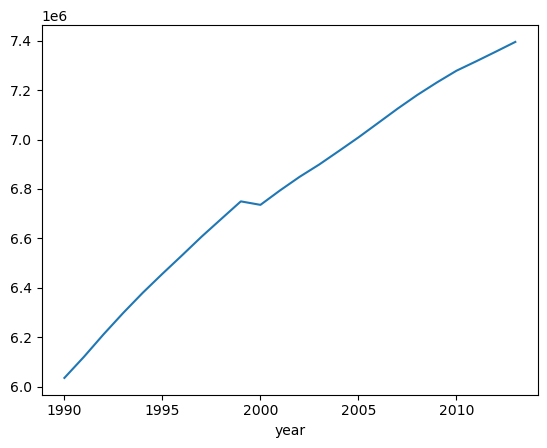

In [125]:
%matplotlib inline
population.groupby(['year'])['population'].mean().plot()

In [127]:
population.groupby(['state'])['population'].mean()

state
AK     4.164389e+05
AL     2.797862e+06
AR     1.686640e+06
AZ     3.337577e+06
CA     2.170908e+07
CO     2.727803e+06
CT     2.128442e+06
DC     3.496533e+05
DE     4.979201e+05
FL     1.008313e+07
GA     5.285421e+06
HI     7.781240e+05
IA     1.831789e+06
ID     8.576250e+05
IL     7.757703e+06
IN     3.838380e+06
KS     1.703569e+06
KY     2.536397e+06
LA     2.811572e+06
MA     3.891187e+06
MD     3.357502e+06
ME     7.906852e+05
MI     6.157709e+06
MN     3.108525e+06
MO     3.522333e+06
MS     1.794283e+06
MT     5.716055e+05
NC     5.140725e+06
ND     4.066764e+05
NE     1.087942e+06
NH     7.675910e+05
NJ     5.227053e+06
NM     1.175271e+06
NV     1.310279e+06
NY     1.171282e+07
OH     7.079279e+06
OK     2.192022e+06
OR     2.146920e+06
PA     7.615765e+06
PR     2.367490e+06
RI     6.390411e+05
SC     2.569703e+06
SD     4.840280e+05
TN     3.579156e+06
TX     1.381758e+07
USA    1.782390e+08
UT     1.536009e+06
VA     4.494164e+06
VT     3.735618e+05
WA     3.74773

In [128]:
population.groupby(['state','year'])['population'].mean()

state  year
AK     1990    365396.0
       1991    376186.5
       1992    386807.0
       1993    393312.0
       1994    395373.5
                 ...   
WY     2009    347405.5
       2010    349786.5
       2011    351368.0
       2012    356576.0
       2013    360168.5
Name: population, Length: 1272, dtype: float64

In [133]:
%time
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = pd.read_csv(url,sep=';')
#You can use the pd.to_csv() to persist the wine data to your local drive.

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


In [134]:
wine.head()#Displays the first 5 records of the wine DataFrame, you can change the number of records to be displayed.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [135]:
wine.info()#Displays the total number of entries, columns( with data types) and the memory usage of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [136]:
wine.values#

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [137]:
#What is the average alcohol % per vol?

wine['alcohol'].mean()

10.422983114446502

quality
3    AxesSubplot(0.125,0.11;0.775x0.77)
4    AxesSubplot(0.125,0.11;0.775x0.77)
5    AxesSubplot(0.125,0.11;0.775x0.77)
6    AxesSubplot(0.125,0.11;0.775x0.77)
7    AxesSubplot(0.125,0.11;0.775x0.77)
8    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

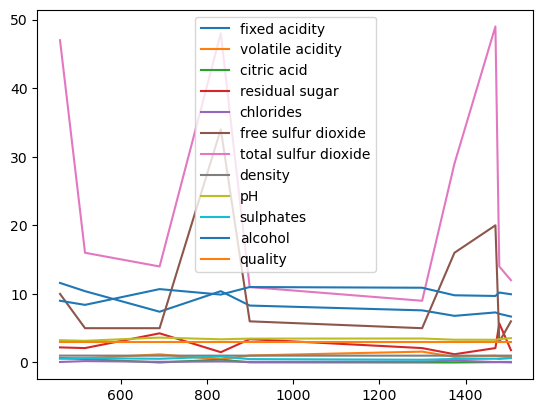

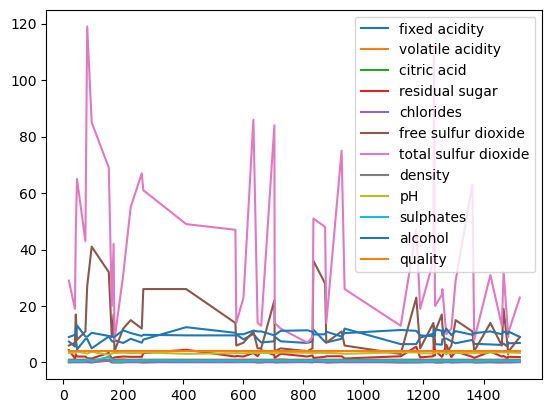

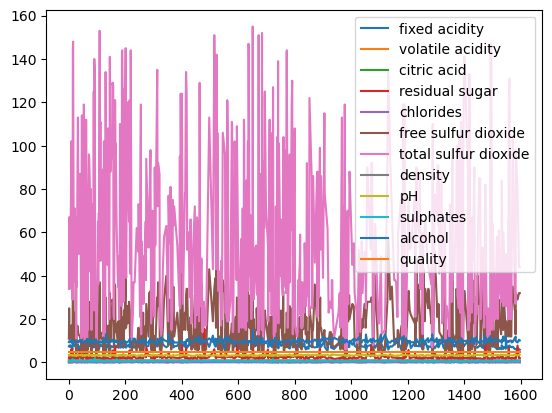

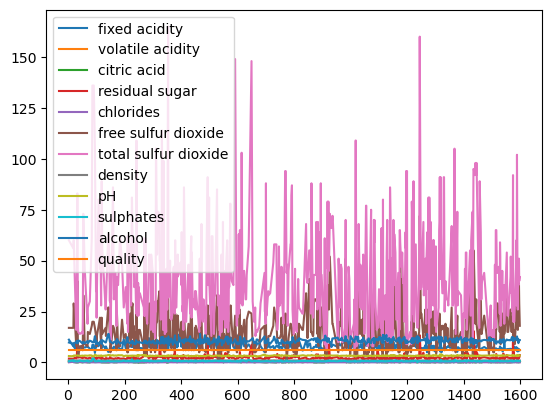

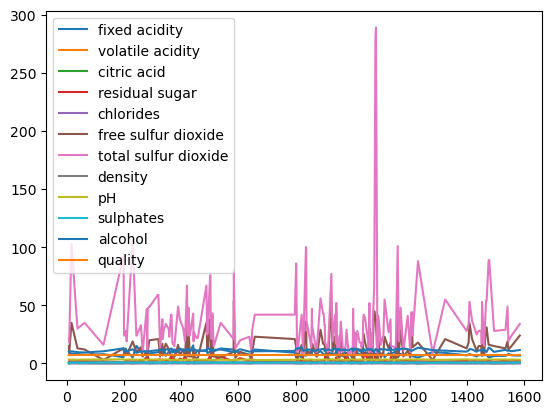

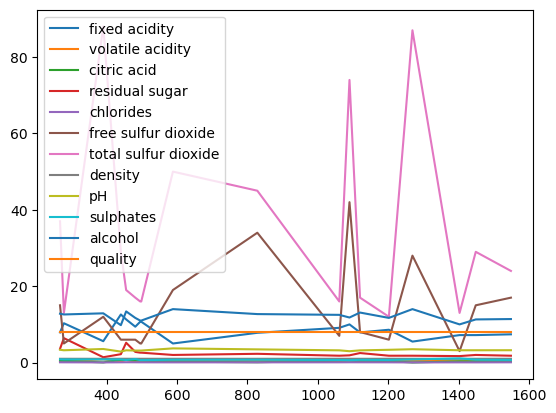

In [138]:
#Let's group the wine according to quality and visualize the grouping

wine.groupby("quality").plot()

In [139]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

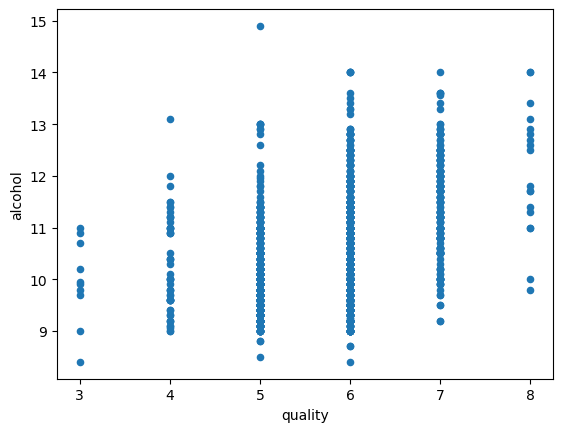

In [142]:
wine.plot(kind="scatter",x="quality",y="alcohol")

In [ ]:
#Compute the wine quality and alcohol ratio

In [143]:
wine['qual_alc ratio'] = wine['quality']/wine['alcohol']

In [144]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual_alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [ ]:
#Sort the wine in descending order of quality

In [145]:
wino= wine.sort_values(by='quality', ascending=False)

In [146]:
wino.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual_alc ratio
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,0.727273
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8,0.800000
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,0.620155
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8,0.640000
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8,0.683761
